In [1]:
from matplotlib import interactive,use
interactive(True)
use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics


In [2]:
%matplotlib inline 

In [3]:
pd.__version__

'0.16.2'

In [4]:
ao = pd.read_csv("./sort_weather_data.csv", delimiter = ",")

In [5]:
ao[0:2]

,time,temperature,preciptation,humidity,windSpeed
0,2014-09-18 18:30:00,27.34,rain,0.68,5.59
1,2014-09-18 19:30:00,28.89,rain,0.63,4.92


In [6]:
pd= DataFrame(ao)

In [7]:
print type(ao)
print type(pd)
# print pd
df =ao
df['time'] = df['time'].astype('datetime64[ns]')
ds=df.set_index('time').resample('H')['temperature']
k=Series(ds)# print "ao"
print type(k)
# print df

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


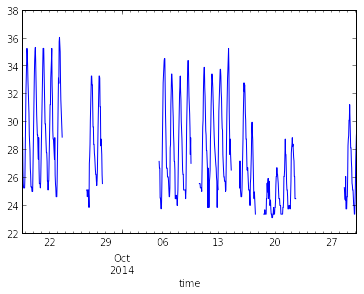

In [9]:
# print k[:]
k[1:1000].plot()

In [ ]:
k.plot()

In [ ]:
print k.head()
print k.tail()

In [ ]:
def objfunc(order, exog, endog):
    from statsmodels.tsa.arima_model import ARIMA
    fit = ARIMA(endog, order, exog).fit()
    return fit.aic()

from scipy.optimize import brute
grid = (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1))
brute(objfunc, k, args=(exog, endog), finish=None)